In [5]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
books = pd.read_csv('books.csv', encoding='ISO-8859-1', parse_dates=True)

In [7]:
# preview of data 

books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.78156E+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.78014E+12,eng,635,783,56,12/1/1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.78014E+12,eng,415,820,95,8/1/1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.78006E+12,eng,434,769,139,2/27/2007,Ecco,NaN


In [8]:
# Data Definitions

# bookID >> contains unique ID for each book / series
# title >> contains title of book
# authors >> contains all authors of particular book - dropped for mainAuthor
# average_rating >> average rating as decided by the users
# isbn >> tells info about a book, edition / publisher
# isbn13 >> newer format for isbn in 2007 - removed
# language_code >> language of the book
# num_pages >> number of pages of book - renamed to: pages
# ratings_count >> number of ratings given for book
# text_reviews_count >> count of reviews left by users
# publication_date >> date book was published
# publisher >> publisher
# mainAuthor >> first author listed of particular book
# pubYear >> just publication year

In [9]:
# Set index as bookID

books = books.set_index('bookID') 

In [10]:
# data info

books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   isbn                11127 non-null  object
 4   isbn13              11127 non-null  object
 5   language_code       11127 non-null  object
 6     num_pages         11127 non-null  object
 7   ratings_count       11127 non-null  int64 
 8   text_reviews_count  11127 non-null  int64 
 9   publication_date    11127 non-null  object
 10  publisher           11127 non-null  object
 11  Unnamed: 12         4 non-null      object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [11]:
# check for nulls

books.isnull().sum()

title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [12]:
# check for fully identical row duplicates

books.duplicated().any()

False

In [13]:
# Creating 'mainAuthor' column

books["mainAuthor"] = books.authors.str.split("/").str[0]

In [14]:
# Dropping columns 'Unnamed: 12', 'authors', 'isbn13'

books.drop(['isbn13', 'Unnamed: 12', 'authors'], axis=1, inplace=True)

In [15]:
# Dropping shifted rows/index 16914, 22128, 34889, 12224

books.drop([16914, 22128, 34889, 12224], axis=0, inplace=True)

In [16]:
# Converting 'publication_date' from object to datetime

books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')

In [17]:
# Creating 'pubYear' year-only column

books['pubYear'] = pd.DatetimeIndex(books['publication_date']).year

In [18]:
# Converting pubYear from float to int
# received error re NaNs so ID the NaNs to remove (drop rows)
# bookIDs are 31373, 45531

boo = books[books.isna().any(axis=1)]
boo

,title,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
bookID,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,4.1,553575104,eng,718,10608,295,NaT,Bantam Books,Elizabeth George,NaN
45531,Montaillou village occitan de 1294 Ã 1324,3.96,2070323285,fre,640,15,2,NaT,Folio histoire,Emmanuel Le Roy Ladurie,NaN


In [19]:
# removing NaNs in pubYear

books.drop([31373, 45531], axis=0, inplace=True)

In [20]:
# converting pubYear from float to int

books['pubYear'] = books['pubYear'].astype(int)

books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11121 non-null  object        
 1   average_rating      11121 non-null  object        
 2   isbn                11121 non-null  object        
 3   language_code       11121 non-null  object        
 4     num_pages         11121 non-null  object        
 5   ratings_count       11121 non-null  int64         
 6   text_reviews_count  11121 non-null  int64         
 7   publication_date    11121 non-null  datetime64[ns]
 8   publisher           11121 non-null  object        
 9   mainAuthor          11121 non-null  object        
 10  pubYear             11121 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 999.2+ KB


In [21]:
# Converting 'average_rating' to float

books['average_rating'] = pd.to_numeric(books['average_rating'], downcast="float", errors='coerce')
books.reset_index(drop=True)

,title,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,439785960,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,J.K. Rowling,2006
1,Harry Potter and the Order of the Phoenix (Har...,4.49,439358078,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,J.K. Rowling,2004
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,439554896,eng,352,6333,244,2003-11-01,Scholastic,J.K. Rowling,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,043965548X,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,J.K. Rowling,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,439682584,eng,2690,41428,164,2004-09-13,Scholastic,J.K. Rowling,2004
...,...,...,...,...,...,...,...,...,...,...,...
11116,Expelled from Eden: A William T. Vollmann Reader,4.06,1560254416,eng,512,156,20,2004-12-21,Da Capo Press,William T. Vollmann,2004
11117,You Bright and Risen Angels,4.08,140110879,eng,635,783,56,1988-12-01,Penguin Books,William T. Vollmann,1988
11118,The Ice-Shirt (Seven Dreams #1),3.96,140131965,eng,415,820,95,1993-08-01,Penguin Books,William T. Vollmann,1993
11119,Poor People,3.72,60878827,eng,434,769,139,2007-02-27,Ecco,William T. Vollmann,2007


In [22]:
# Rename num_pages to pages

books.rename(columns={'  num_pages':'pages'}, inplace=True)
books.rename(columns={'Pages':'pages'}, inplace=True)

In [23]:
# Converting pages from object to int

books['pages'] = books['pages'].astype(int)

In [24]:
# choosing to use only english language data (bc font did not convert well)

engbooks = books[(books.language_code == 'eng')]
engbooks

,title,average_rating,isbn,language_code,pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,439785960,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,J.K. Rowling,2006
2,Harry Potter and the Order of the Phoenix (Har...,4.49,439358078,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,J.K. Rowling,2004
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,439554896,eng,352,6333,244,2003-11-01,Scholastic,J.K. Rowling,2003
5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,043965548X,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,J.K. Rowling,2004
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,439682584,eng,2690,41428,164,2004-09-13,Scholastic,J.K. Rowling,2004
...,...,...,...,...,...,...,...,...,...,...,...
45572,Fantastic Mr. Fox (Cover to Cover),4.05,1855495090,eng,90,7,0,1995-09-15,BBC Audiobooks,Roald Dahl,1995
45631,Expelled from Eden: A William T. Vollmann Reader,4.06,1560254416,eng,512,156,20,2004-12-21,Da Capo Press,William T. Vollmann,2004
45633,You Bright and Risen Angels,4.08,140110879,eng,635,783,56,1988-12-01,Penguin Books,William T. Vollmann,1988


In [25]:
engbooks.describe()

,average_rating,pages,ratings_count,text_reviews_count,pubYear
count,8907.000000,8907.000000,8.907000e+03,8907.000000,8907.000000
mean,3.934039,336.754575,2.157150e+04,645.195913,2000.075109
std,0.358854,246.353397,1.252158e+05,2863.031302,8.156913
min,0.000000,0.000000,0.000000e+00,0.000000,1900.000000
25%,3.780000,194.000000,1.410000e+02,11.000000,1998.000000
50%,3.960000,298.000000,1.000000e+03,59.000000,2003.000000
75%,4.140000,415.500000,6.572000e+03,300.000000,2005.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,2020.000000


In [26]:
engbooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8907 entries, 1 to 45639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               8907 non-null   object        
 1   average_rating      8907 non-null   float32       
 2   isbn                8907 non-null   object        
 3   language_code       8907 non-null   object        
 4   pages               8907 non-null   int32         
 5   ratings_count       8907 non-null   int64         
 6   text_reviews_count  8907 non-null   int64         
 7   publication_date    8907 non-null   datetime64[ns]
 8   publisher           8907 non-null   object        
 9   mainAuthor          8907 non-null   object        
 10  pubYear             8907 non-null   int32         
dtypes: datetime64[ns](1), float32(1), int32(2), int64(2), object(5)
memory usage: 730.7+ KB


In [27]:
print("Dataset contains {} rows and {} columns".format(engbooks.shape[0], engbooks.shape[1]))

Dataset contains 8907 rows and 11 columns


In [28]:
# duplicate titles
# not all dupes - many misspelled or diff spacing

TitleDupes = engbooks['title'].value_counts()
pd.DataFrame(data=TitleDupes, columns=['title'])[:30]

,title
The Brothers Karamazov,9
Gulliver's Travels,7
The Odyssey,7
Anna Karenina,7
The Iliad,7
Sense and Sensibility,6
Macbeth,6
The Great Gatsby,6
Collected Stories,6
'Salem's Lot,6


In [29]:
# list of unique publishers

uniquePublishers = books['publisher'].unique()
pd.DataFrame(data=uniquePublishers, columns=['publishers'])

,publishers
0,Scholastic Inc.
1,Scholastic
2,Nimble Books
3,Gramercy Books
4,Del Rey Books
...,...
2284,DEBOLS!LLO
2285,Alfaguara Infantil
2286,Suma
2287,Panamericana Editorial


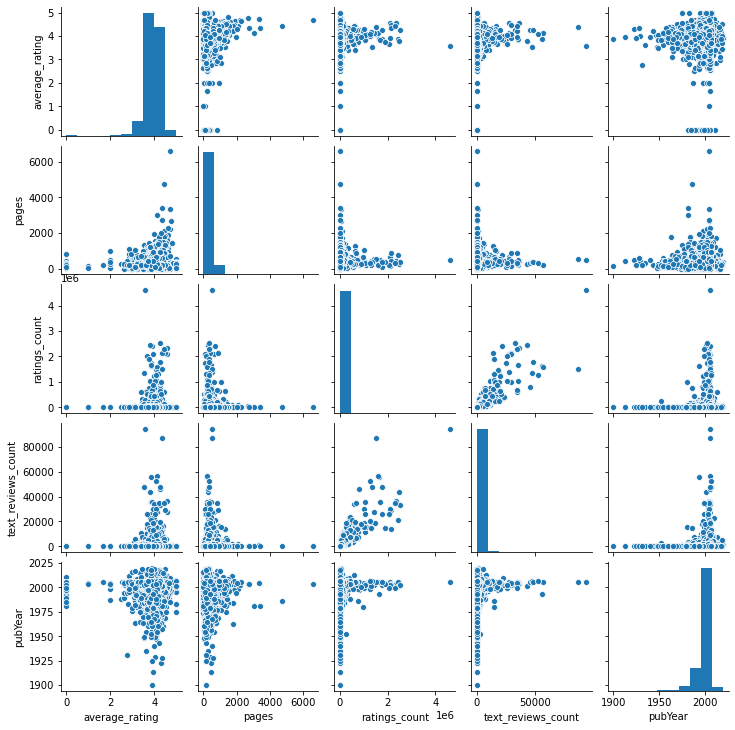

In [30]:
# pairwise distribution of numeric data
# shows continuous vs. categorical relationships

sns.pairplot(engbooks, height=2)
plt.show()

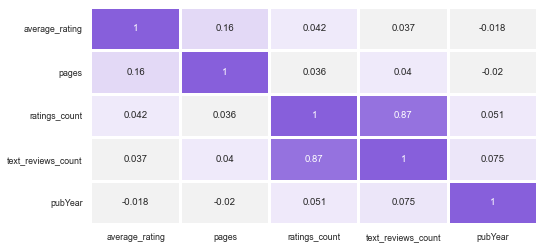

In [31]:
# How do categories correlate?

def correlation_heatmap(data_frame=engbooks): #get data & define function
    sns.set(context='paper') #seaborn to set style
    corrobj = engbooks.corr()
    fig, ax = plt.subplots(figsize=(8, 4)) #generate heatmap figure object (fig) & axis object (ax) aka the plot
    cmap = sns.diverging_palette(250, 275, center='light', as_cmap=True) #seaborn for color palettes
    heatmap = sns.heatmap(corrobj, vmax=1,vmin=-1,center=0, square=False, annot=True, cmap=cmap, lw=2, cbar=False) #draws heatmap 
    return heatmap #tells function to return heatmap

correlation_heatmap() #calls defined function

#reflects some correlation bt text reviews count & pubYear

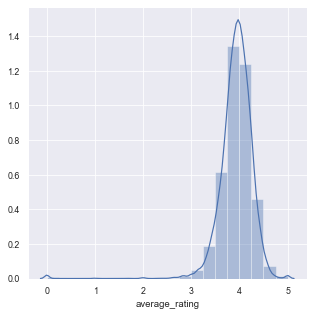

In [32]:
# Distribution of average ratings 

plt.figure(figsize=(5,5))
rating = books.average_rating.astype(float)
sns.distplot(rating, bins=20)

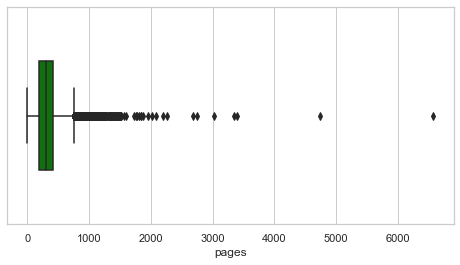

In [33]:
# page outliers

sns.set(rc={'figure.figsize':(8, 4)}, style='whitegrid')
sns.boxplot(engbooks['pages'], width=.5, color='green')

In [34]:
# identifying obvious outliers

page_outliers = engbooks[engbooks['pages']>=3000]
page_outliers

,title,average_rating,isbn,language_code,pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
bookID,,,,,,,,,,,
10,Harry Potter Collection (Harry Potter #1-6),4.73,439827604,eng,3342,28242,808,2005-09-12,Scholastic,J.K. Rowling,2005
24520,The Complete Aubrey/Maturin Novels (5 Volumes),4.70,039306011X,eng,6576,1338,81,2004-10-17,W. W. Norton Company,Patrick O'Brian,2004
25587,The Second World War,4.45,039541685X,eng,4736,1493,99,1986-05-09,Mariner Books,Winston S. Churchill,1986
25709,Summa Theologica 5 Vols,4.12,870610635,eng,3020,2734,84,1981-01-01,Christian Classics,Thomas Aquinas,1981
44613,Remembrance of Things Past (Boxed Set),4.34,701125594,eng,3400,6,1,1981-03-05,Chatto & Windus,Marcel Proust,1981


In [35]:
# books that have less than 100 pages 

shorties = engbooks[engbooks['pages']<=100]
shorties

,title,average_rating,isbn,language_code,pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
bookID,,,,,,,,,,,
16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,739322206,eng,6,1266,253,2005-03-23,Random House Audio,Douglas Adams,2005
22,Bill Bryson's African Diary,3.44,767915062,eng,55,7270,499,2002-12-03,Broadway Books,Bill Bryson,2002
51,"Hatchet: A Guide for Using ""Hatchet"" in the Cl...",4.00,1557344493,eng,48,36,2,1994-08-28,Teacher Created Resources,Donna Ickes,1994
54,Molly Hatchet - 5 of the Best,4.33,1575606240,eng,56,6,0,2003-06-10,Cherry Lane Music Company,Molly Hatchet,2003
85,The Heidi Chronicles,3.75,822205106,eng,81,1423,70,2002-03-01,Dramatists Play Service,Wendy Wasserstein,2002
...,...,...,...,...,...,...,...,...,...,...,...
45465,Artemis Fowl (Artemis Fowl #1),3.84,1400085918,eng,6,55,14,2004-04-06,Listening Library,Eoin Colfer,2004
45472,Treasury of American Tall Tales: Volume 1: Dav...,3.86,739336509,eng,0,36,9,2006-08-22,Listening Library (Audio),David Bromberg,2006
45485,The Subtle Knife (His Dark Materials #2),4.13,807210471,eng,8,39,8,2000-01-28,Listening Library,Philip Pullman,2000


In [36]:
# to deal with most recent years

afterNinetys = engbooks[['pubYear','ratings_count']][engbooks['pubYear']>=1990]
afterNinetys

,pubYear,ratings_count
bookID,,
1,2006,2095690
2,2004,2153167
4,2003,6333
5,2004,2339585
8,2004,41428
...,...,...
45564,1998,14
45572,1995,7
45631,2004,156


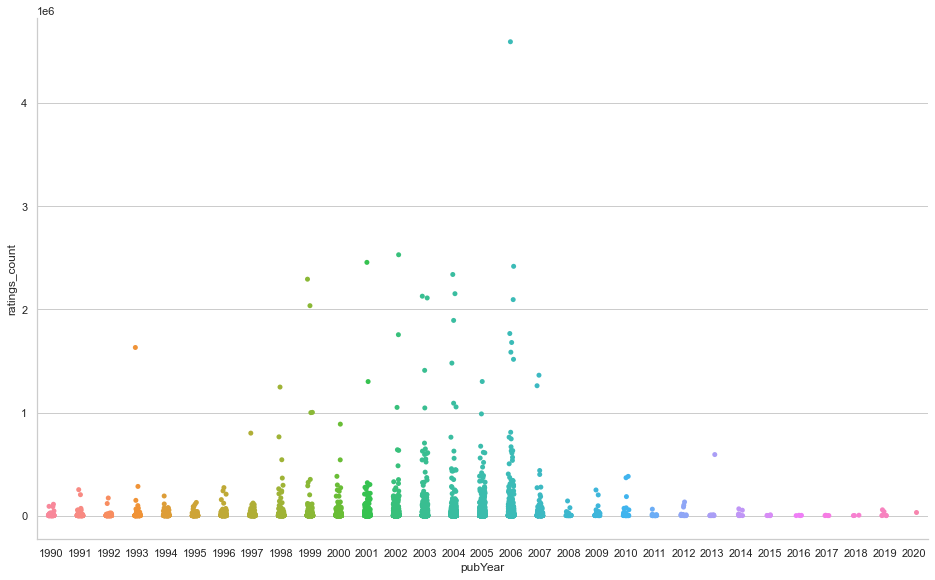

In [37]:
# catplot of pubYear RatingsCount
# different ways to mess with re-sizing
# one is thru seaborn
# other is through matplotlib

# sns.catplot(x='pubYear', y='ratings_count', data=YearlyRatingsCount, sizes=(100,200), aspect=10)

thisplot = sns.catplot(x='pubYear', y='ratings_count', data=afterNinetys)
thisplot.fig.set_figwidth(15)
thisplot.fig.set_figheight(9)

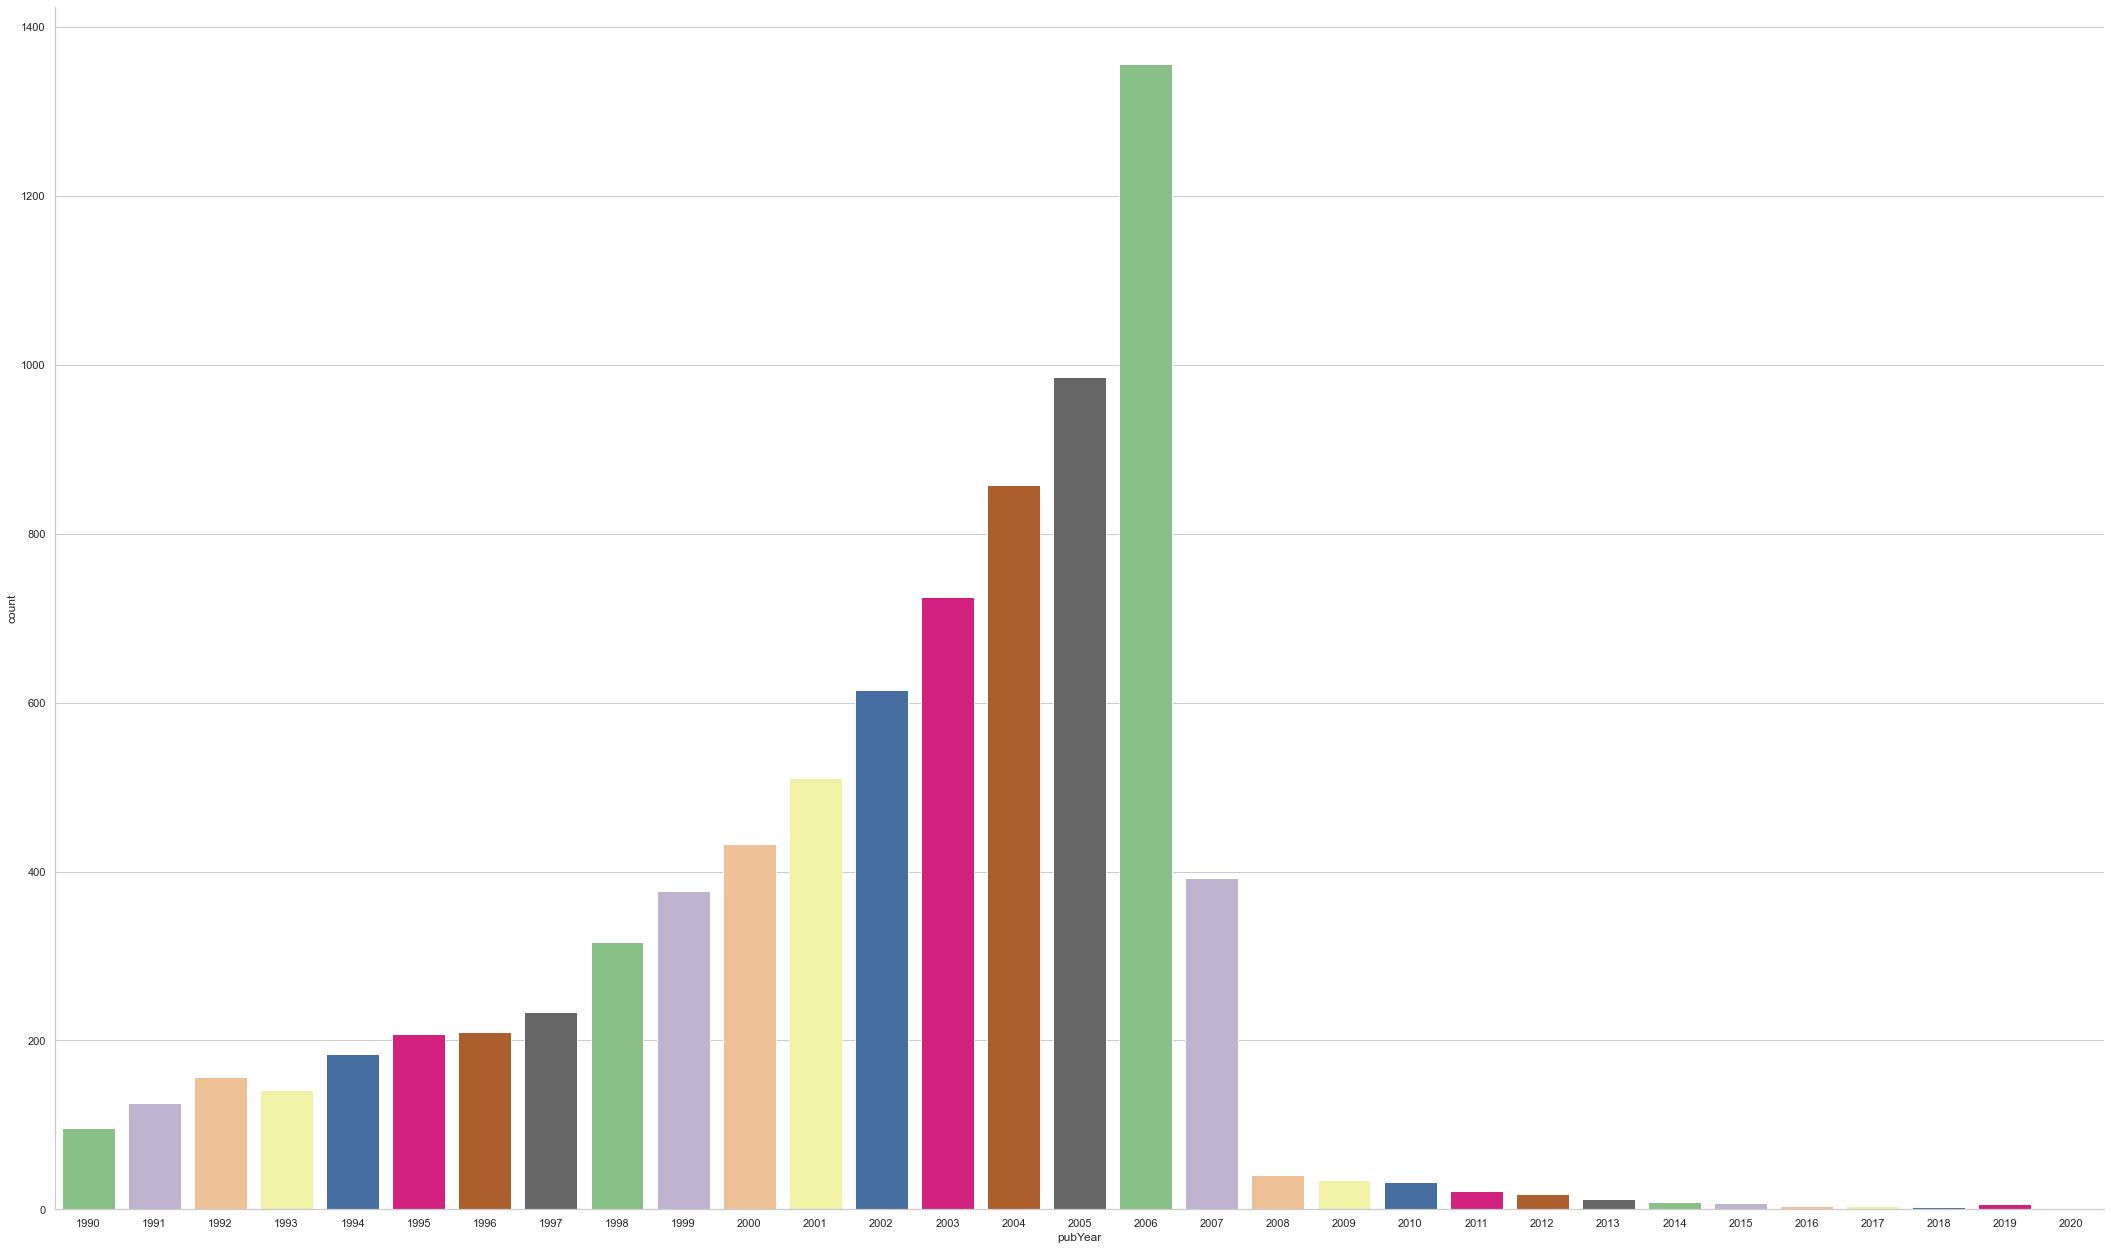

In [38]:
# orig used factor plot received warning that factorplot changed to catplot 
# kind=count auto counts the num of values in ea category & displays them on Y axis
# not sure what it's counting

cat = sns.catplot(x='pubYear', data=afterNinetys, kind='count', palette='Accent')
cat.fig.set_figwidth(35)
cat.fig.set_figheight(20)

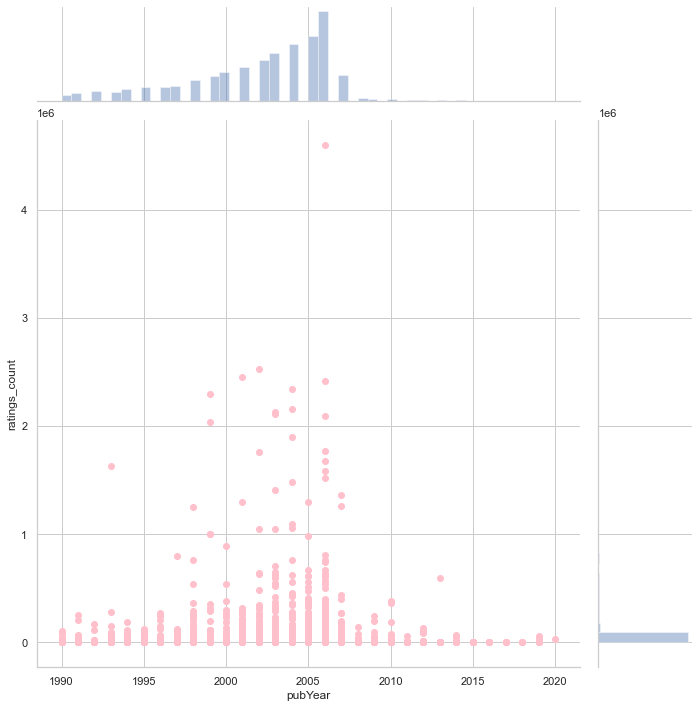

In [39]:
# just curious
# relationship between publication year & amount of ratings on GoodReads

sns.set_style('whitegrid')
sns.jointplot("pubYear", "ratings_count", data=afterNinetys, kind='scatter', height=10, joint_kws={'color':'pink'})
plt.show()

<Figure size 1080x720 with 0 Axes>

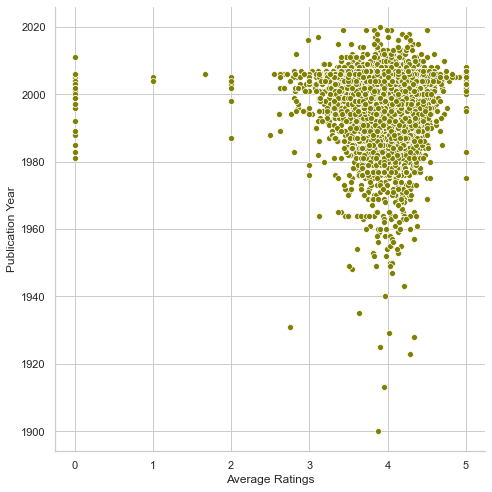

In [40]:
# @aayushmishra1512 [https://www.kaggle.com/code/aayushmishra1512/what-should-you-read-next-book-recommender]
# relationship between publication year and average rating

plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="pubYear", data = engbooks, color = 'olive',sizes=(200, 400), height=7, marker='o')
ax.set_axis_labels("Average Ratings", "Publication Year")

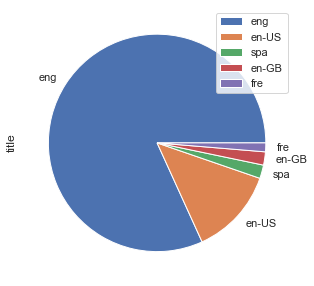

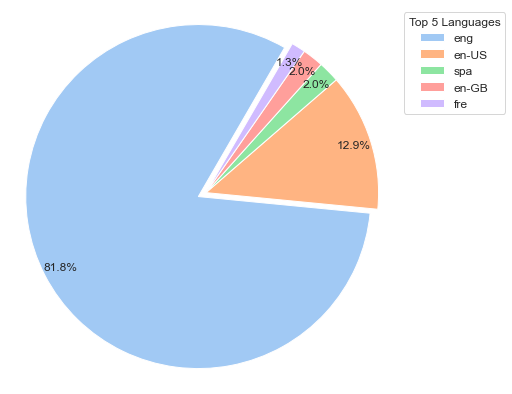

In [41]:
# books in each language

# could rename publishers to reflect only Big 5 Publishers instead of their imprints
# 'imprints' are divisions of major publishers, found on major publishers's site
# ex - https://www.penguinrandomhouse.com/imprints

# pandas pie chart
# 'rot=0' is for rotational ticks

langs = books.groupby('language_code')['title'].count().reset_index().sort_values('title', ascending=False).head(5).set_index('language_code').plot.pie(subplots=True, figsize=(5,5))

# matplotlib pie chart
# @GREESHMA's example but with the legend popped out - https://www.kaggle.com/code/greeshmagirish/goodreads-eda-with-matplotlib-and-seaborn

# get df
lang_counts = pd.DataFrame(books.language_code.value_counts())
lang_counts = lang_counts.reset_index()
lang_counts = lang_counts.rename(columns={"index": "lang_code", "language_code": "counts"})
top_5_lang = lang_counts.sort_values(['counts'], ascending=False).head(5)

# set values
labels = top_5_lang.lang_code
counts = top_5_lang.counts
explode = (.05, 0, 0, 0,0)
colors = sns.color_palette('pastel')

# set figure and plot
fig, ax = plt.subplots(figsize = (7,7))
ax.pie(counts, explode=explode, autopct='%1.1f%%', shadow=False, startangle=60, colors=colors, pctdistance=.9)
ax.axis('equal')
plt.legend(title='Top 5 Languages', bbox_to_anchor=(1, 1), loc='upper left', labels=labels, fontsize=12, title_fontsize=12)

plt.show()

In [42]:
# books under 200 pages
# what difference bt below bc same output
# help [https://www.kaggle.com/code/data13/predict-book-rating-with-linear-regression]

zeropgs1 = engbooks[engbooks['pages']==0]
zeropgs2 = engbooks.loc[engbooks['pages']==0]

# len(zeropgs1)
zeropgs2

,title,average_rating,isbn,language_code,pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,4.70,802415318,eng,0,22,4,2005-01-01,Moody Publishers,Gary Chapman,2005
2835,The Tragedy of Pudd'nhead Wilson,3.79,140015068X,eng,0,3,0,2003-01-01,Tantor Media,Mark Twain,2003
3593,Murder by Moonlight & Other Mysteries (New Adv...,4.00,743564677,eng,0,7,2,2006-10-03,Simon Schuster Audio,NOT A BOOK,2006
3599,The Unfortunate Tobacconist & Other Mysteries ...,3.50,074353395X,eng,0,12,1,2003-10-01,Simon & Schuster Audio,NOT A BOOK,2003
4249,The Da Vinci Code (Robert Langdon #2),3.84,739339788,eng,0,91,16,2006-03-28,Random House Audio,Dan Brown,2006
5362,The Summons / The Brethren,3.99,739342770,eng,0,241,9,2006-10-10,Random House Audio,John Grisham,2006
6542,The Patricia Cornwell CD Audio Treasury: All T...,4.16,60791217,eng,0,202,1,2005-07-26,HarperAudio,Patricia Cornwell,2005
6953,Like Water for Chocolate,3.95,739334190,eng,0,121,33,2006-05-02,Random House Audio,Laura Esquivel,2006
7598,A Study Guide to Gabriel Garcia Marquez' One H...,4.11,1570421129,eng,0,75,2,2006-04-01,Warner Adult,Gabriel GarcÃ­a MÃ¡rquez,2006


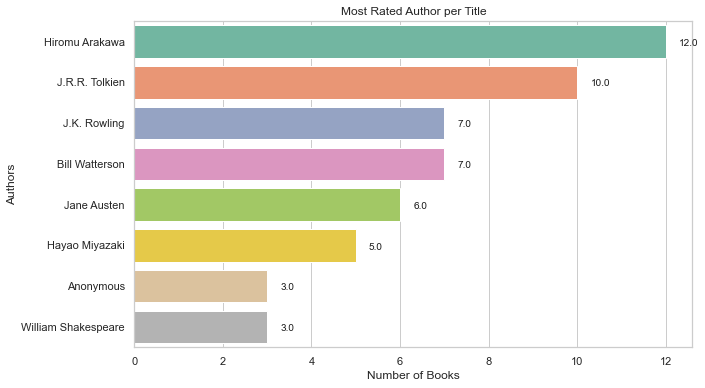

In [43]:
# Most Rated Author per Title
# help @hoshi7 [https://www.kaggle.com/code/hoshi7/goodreads-analysis-and-recommending-books]

high_rated_author = engbooks[engbooks['average_rating']>=4.5]
high_rated_author = high_rated_author.groupby('mainAuthor')['title'].count().reset_index().sort_values('title', ascending = False).head(8).set_index('mainAuthor')
plt.figure(figsize=(10,6))

ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette = 'Set2')
ax.set_title('Most Rated Author per Title')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize=10, color='k')

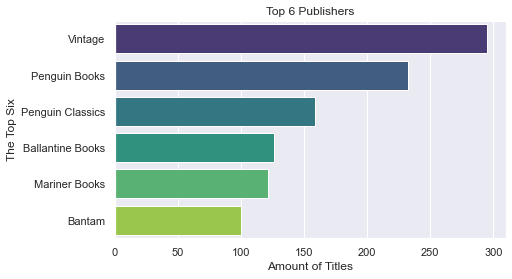

In [44]:
# Top 6 Publishers (because PH Imprints takes 2 spots)

# List
engbooks['publisher'].value_counts()[:6].index.tolist()

# Bar Plot
topPubs = engbooks['publisher'].value_counts()[:6]

sns.set()
plt.figure(figsize=(7,4))
sns.barplot(x=topPubs, y=topPubs.index, palette='viridis')

plt.title('Top 6 Publishers')
plt.xlabel('Amount of Titles')
plt.ylabel('The Top Six')
plt.show()

In [45]:
# Authors at Penguin House Random

PenguinHR = engbooks[engbooks.publisher.str.contains("penguin", case=False)]

PenguinHRs = PenguinHR['mainAuthor'].unique().tolist()
PenguinHRs

['Leo Tolstoy',
 'Mulk Raj Anand',
 'Henry James',
 'Kahlil Gibran',
 'Don DeLillo',
 'Thomas Pynchon',
 'Richard FariÃ±a',
 'Paul Auster',
 'Jared Diamond',
 'John Steinbeck',
 'Peter  Stone',
 'Eric Schlosser',
 'Michael   Lewis',
 'Robert Templer',
 'Robert Greene',
 'Plato',
 'Herodotus',
 'Homer',
 'William Shakespeare',
 'Euripides',
 'Aeschylus',
 'Sophocles',
 'Aristophanes',
 'Garry Wills',
 'Ovid',
 'Michel Foucault',
 'Sue Birtwistle',
 'Jane Austen',
 'Charles Dickens',
 'Daniel C. Dennett',
 'Gustave Flaubert',
 'Abigail Adams',
 'John  Adams',
 'David D. Burns',
 'Bryce Courtenay',
 'Herman Melville',
 'H.G. Wells',
 'Jack Kerouac',
 'David    Allen',
 'Geoffrey Chaucer',
 'Mark Kurlansky',
 'Tracy Chevalier',
 'Patrick SÃ¼skind',
 'Daniel Defoe',
 'Mark Twain',
 'Frances Hodgson Burnett',
 'E.M. Forster',
 'Gordon S. Wood',
 'Wallace Stegner',
 "Tim O'Brien",
 'Gwyn Hyman Rubio',
 'Marisha Pessl',
 'Zadie Smith',
 'Graham Greene',
 'Ian Fleming',
 'P.D. James',
 'Miguel 

In [46]:
# Authors at Simon & Schuster

SimonSchuster = engbooks[engbooks.publisher.str.contains("simon", case=False) 
                      & engbooks.publisher.str.contains("schuster", case=False)]

SSAuthors = SimonSchuster['mainAuthor'].unique().tolist()
SSAuthors

['Robert Louis Stevenson',
 'Robert D. Putnam',
 'David McCullough',
 'Sophocles',
 'William Shakespeare',
 'Jon Ronson',
 'Jung Chang',
 'Charles Dickens',
 'Daniel C. Dennett',
 'Ernest Hemingway',
 'Doris Kearns Goodwin',
 'Stephen R. Covey',
 'H.G. Wells',
 'Jonathan Swift',
 'Deloris Jordan',
 "Madeleine L'Engle",
 'Jean Estoril',
 'Colleen McCullough',
 'NOT A BOOK',
 'Libba Bray',
 'Pete Hautman',
 'David Sedaris',
 'Sandra Boynton',
 'Frank McCourt',
 'Stephen King',
 'Primo Levi',
 'Peter Biskind',
 'John Sandford',
 'Alexandre Dumas',
 'Hunter S. Thompson',
 'Steve Erickson',
 'Nikos Kazantzakis',
 'Jimmy Carter',
 'Joseph Heller',
 'Walter Isaacson',
 'Iain M. Banks',
 'Nathaniel Hawthorne',
 'Sarah Vowell',
 'Bob Dylan',
 'Herman Melville',
 'Mark Zwonitzer',
 'Kate Chopin',
 'P.G. Wodehouse',
 'Richard Rhodes',
 'Chris Offutt',
 'Mary Gaitskill',
 'Peter Straub',
 'Garry Wills',
 'William Murray',
 'Anne Easter Smith',
 'Stephen Hunter',
 'Douglas Coupland',
 'Marissa Moss

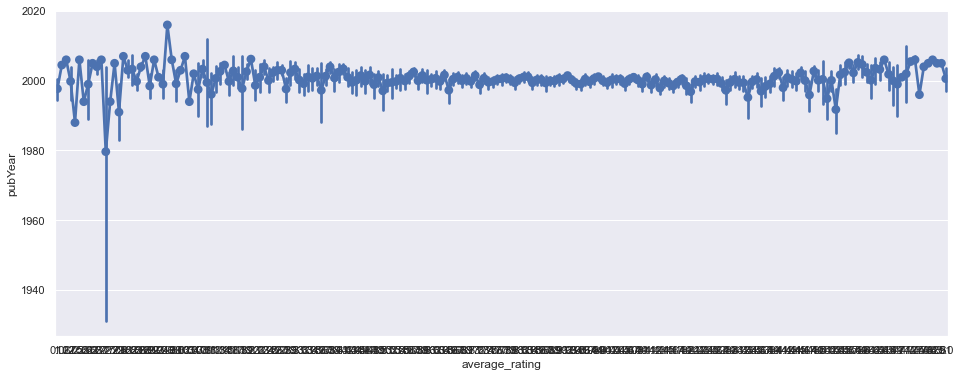

In [47]:
# line plot to show how many used GoodReads to post a review per year
# @shuaibing [https://www.kaggle.com/shuaibing/book-data-analysis]
# this looks just like the factorplot that is no longer being used
# this is ugly but just curious about what it would look like

plt.figure(figsize=(16,6))
sns.pointplot(x="average_rating",y="pubYear",data=engbooks)

<Figure size 1152x1152 with 0 Axes>

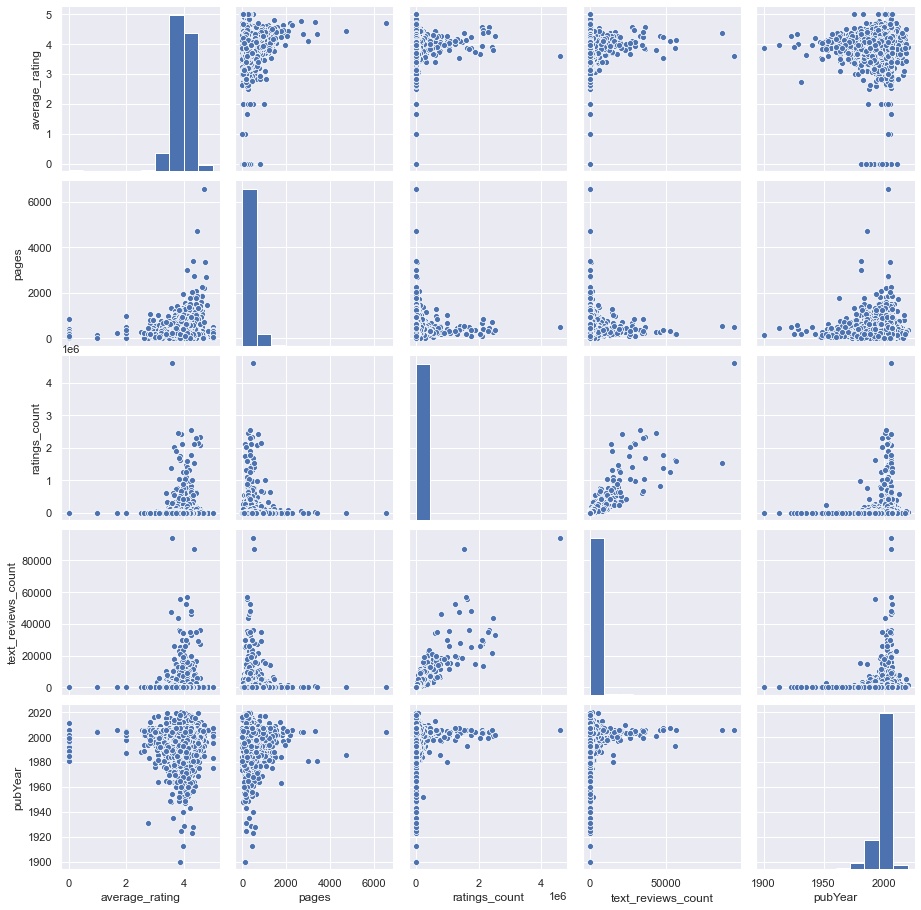

In [48]:
# pairplot on final clean data

plt.figure(figsize=(16,16))
sns.pairplot(engbooks)

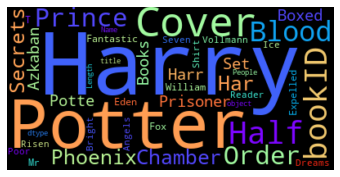

In [49]:
# WORDCLOUD
# WordCloud of Titles
# need to use .generate(str(text)) to generate tite col as string
# wordclouds are mainly used to visually draw attention

text = engbooks.title
wordcloud = WordCloud(colormap='rainbow').generate(str(text))

#display generated image
plt.figure(figsize=(6,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
# WORDCLOUD alternative
# function that plots wordcloud
# collocation - ensure doesnt contain any bigrams or dup words
# stopwords - eliminates commonly English lang words 

# text = engbooks.title
# wordcloud = WordCloud(colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(str(text))

# def plot_cloud(wordcloud):
#     plt.imshow(wordcloud)
#     plt.axis('off')

# plot_cloud(wordcloud)

In [134]:
# RECOMMENDATION ENGINE

# KMeans clustering: unsupervised learning type that groups unlabelled datal; goal: find groups in data
# find groups (relationships) between rating count & avg rating value
# @hoshi7

# where each data point belongs to only 1 group
# assigns data points to a cluster such that the sum of the squared distaince bt dat point & cluster's centroid is at min
# centroid: mean of all data points belonging to that cluster
# we pick k spot where SSE starts to flatten out, forming elbow

# explaning .T (transpose): https://stackoverflow.com/questions/5741372/syntax-in-python-t
# transposes both columns in 'trial' to conventiently separate x and y parts of sequence unpacking

# unsupervised ML algorithm that groups data into k num of clusters
# num of cluster is user defined & alg will group data even if its not optimal 
# so we need to know the most optimal - elbow method

3643

In [51]:
trial = engbooks[['average_rating', 'ratings_count']]
datamodel = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T
datamodel

array([[4.57000017e+00, 2.09569000e+06],
       [4.48999977e+00, 2.15316700e+06],
       [4.42000008e+00, 6.33300000e+03],
       ...,
       [4.07999992e+00, 7.83000000e+02],
       [3.96000004e+00, 8.20000000e+02],
       [3.72000003e+00, 7.69000000e+02]])

In [52]:
# leaving this here to show where it is needed

from sklearn.cluster import KMeans

In [53]:
# ELBOW METHOD

# most popular method for determining optinmal num of clusters
# based on calc the Within-Cluster-Sum of Squared Errors (WSS) for diff num of clusters (k) + selecton k where WSS begins to deminish
# idea behind the method: variation changes fast for small num of clusters then slows down leading to an elbow formation in curve
# elbow point is num of clusters to use for clustering algorithm
# can use YellowBrick 
# all above from - https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad



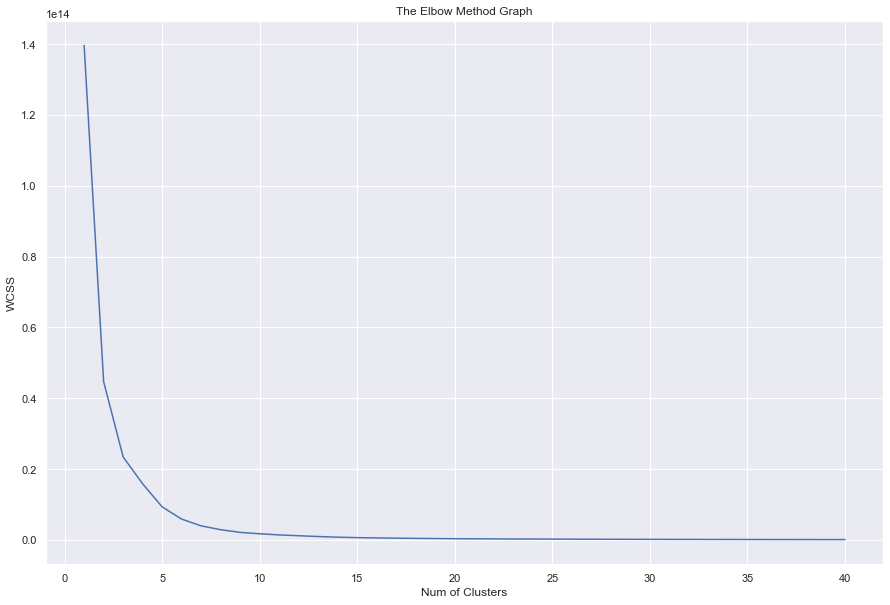

In [54]:
# elbow method to find the num of clusters needed
# help from: https://medium.com/@sametgirgin/k-means-clustering-model-in-6-steps-with-python-dfe95e5a5fac

wcss = []

x = datamodel # creating object for x,y data

# 1st, loop will fit k-means algorithm to my data
# 2nd, compute the within cluster sum of squares(WCSS)
# 3rd, append our wcss list (above)
# init: random initialization method
# select kmeans++ method to find final clusters when k-means alg is running

for cluster in range(1,41):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=40)
    kmeans.fit(x) #kmeas alg fits to X dataset
    wcss.append(kmeans.inertia_) 
    
    #kmeans interia__: sum of squared distances of samples to their closest cluster center
    
    
# plotting the Elbow Graph

plt.figure(figsize=(15,10)) #set fig size
plt.plot(range(1,41), wcss) #plotting
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method Graph')
plt.show()

In [56]:
# create new column with new calculated data

engbooks.loc[ (engbooks['average_rating'] >= 0) & (engbooks['average_rating'] <= 1), 'rating_between'] = "bt_0-1"
engbooks.loc[ (engbooks['average_rating'] > 1) & (engbooks['average_rating'] <= 2), 'rating_between'] = "bt_1-2"
engbooks.loc[ (engbooks['average_rating'] > 2) & (engbooks['average_rating'] <= 3), 'rating_between'] = "bt_2-3"
engbooks.loc[ (engbooks['average_rating'] > 3) & (engbooks['average_rating'] <= 4), 'rating_between'] = "bt_3-4"
engbooks.loc[ (engbooks['average_rating'] > 4) & (engbooks['average_rating'] <= 5), 'rating_between'] = "bt_4-5"

engbooks.head()

C:\Users\Haven\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,title,average_rating,isbn,language_code,pages,ratings_count,text_reviews_count,publication_date,publisher,mainAuthor,pubYear,rating_between
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,439785960,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,J.K. Rowling,2006,bt_4-5
2,Harry Potter and the Order of the Phoenix (Har...,4.49,439358078,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,J.K. Rowling,2004,bt_4-5
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,439554896,eng,352,6333,244,2003-11-01,Scholastic,J.K. Rowling,2003,bt_4-5
5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,043965548X,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,J.K. Rowling,2004,bt_4-5
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,439682584,eng,2690,41428,164,2004-09-13,Scholastic,J.K. Rowling,2004,bt_4-5


In [65]:
# creating features table for Rating Distribution

booksfts = pd.concat([engbooks['rating_between'].str.get_dummies(sep=","), engbooks['average_rating'], engbooks['ratings_count']], axis=1)
booksfts.head()

,bt_0-1,bt_1-2,bt_2-3,bt_3-4,bt_4-5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.57,2095690
2,0,0,0,0,1,4.49,2153167
4,0,0,0,0,1,4.42,6333
5,0,0,0,0,1,4.56,2339585
8,0,0,0,0,1,4.78,41428


In [66]:
# min-max scaler is used to reduce bias that wouldve been present 
# due to some books having many features while others have less
# finds median for them all & equalizes it 

from sklearn.preprocessing import MinMaxScaler

In [68]:
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(booksfts)

In [69]:
np.round(booksfts, 2)

,bt_0-1,bt_1-2,bt_2-3,bt_3-4,bt_4-5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.57,2095690
2,0,0,0,0,1,4.49,2153167
4,0,0,0,0,1,4.42,6333
5,0,0,0,0,1,4.56,2339585
8,0,0,0,0,1,4.78,41428
...,...,...,...,...,...,...,...
45572,0,0,0,0,1,4.05,7
45631,0,0,0,0,1,4.06,156
45633,0,0,0,0,1,4.08,783


In [70]:
from sklearn import neighbors

In [74]:
# algorithm: alg used to compute nearest neighbors
# ball_tree, kd_tree, brute, auto : https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940
# ball tree aka metric tree: organize & structure data pts consider the metric space that points are located # divides data pts into 2 clusters 

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(booksfts)

distance, indices = model.kneighbors(booksfts)

In [75]:
# creating specific functions to help find book names:

# get index from Title
def getindexfromname(name):
    return engbooks[engbooks['title']==name].index.tolist()[0]

allbooksnames = list(engbooks.title.values)

# get ID from partial name
def getIDfrompartialname(partial):
    for name in allbooksnames:
        if partial in name:
            print(name, allbooksnames.index(name))

# pick similar books from ft dataset- uses indices from nn to pick books
def printsimbooks(query=None, id=None):
    if id:
        for id in indices[id][1:]:
            print(engbooks.iloc[id]['title'])
    if query:
        foundID = getindexfromname(query)
        for id in indices[foundID][1:]:
            print(engbooks.iloc[id]['title'])

In [78]:
printsimbooks("The Hobbit")

The Light Fantastic (Discworld  #2; Rincewind #2)
My Ãntonia (Great Plains Trilogy  #3)
Moloka'i (Moloka'i #1)
Dead Beat (The Dresden Files  #7)
Eleven on Top (Stephanie Plum  #11)


In [79]:
getIDfrompartialname("Pride &")

Pride & Prejudice 455
The Complete Novels of Jane Austen  Vol 1: Sense & Sensibility/Pride & Prejudice/Mansfield Park 3380


In [80]:
printsimbooks(id=5)

Kurt Vonnegut's Cat's Cradle (Modern Critical Interpretations)
The First Four Years  (Little House  #9)
Time of the Twins (Dragonlance: Legends  #1)
Hunger
Seduced by Moonlight (Merry Gentry  #3)


In [150]:
# @snanilim example did not work for me 
# receiving error poss bc PIL/Pillow installation

# def book_rec_engine(book_name):
#     booklistname = []
#     book_ID = engbooks[engbooks['title'] == book_name].index
#     book_ID = book_ID
    
#     for newid in idlist[book_ID]:
#         booklistname.append(engbooks.loc[newid].title)
#     return booklistname

# booklistname = book_rec_engine('Halfblood Prince')
# booklistname